## ANOVA (Análise de Variância):

**Sobre ANOVA:** Faz uma análise de variância de grupos em relação a média, mostrando o quão significativo o resultado é

**Testando as hipóteses:**

**H0:** Não há diferença significativa

**H1:** Há diferença significativa

In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from scipy.stats import norm

In [2]:
arr = norm.rvs(loc=50, scale=10, size=100)
arr2 = norm.rvs(loc=90, scale=20, size=100)
arr3 = norm.rvs(loc=10, scale=3, size=100)
array = np.concatenate([arr, arr2, arr3]).reshape((50, 6))

In [3]:
df = pd.DataFrame(array, columns=['Primeira', 'Segunda', 'Terceira', 'Quarta', 'Quinta', 'Sexta'])
df.describe()

,Primeira,Segunda,Terceira,Quarta,Quinta,Sexta
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,46.395307,51.648727,46.199946,49.121744,52.440201,52.726342
std,34.561018,35.217587,34.449901,35.508069,36.273215,39.580676
min,1.830323,4.686267,4.641915,4.087347,2.809909,3.630232
25%,10.562868,13.420772,12.034654,11.318079,12.451734,12.190266
50%,44.984819,57.746808,41.729750,46.514669,54.250371,49.136307
75%,62.023309,75.782230,70.471387,78.344300,79.726925,88.627604
max,116.282529,133.585723,130.501738,118.474785,128.028279,127.597174


In [13]:
df['Setima'] = df['Segunda'].values < 50
df['Nona'] = df['Oitava'] == df['Setima']
df.head()

,Primeira,Segunda,Terceira,Quarta,Quinta,Sexta,Setima,Oitava,Nona
0,52.512120,60.206968,45.784072,37.940408,54.590326,54.698882,False,True,False
1,44.805195,52.713150,34.084662,44.137193,50.766581,47.286531,False,False,True
2,54.364414,58.365638,45.256344,63.313190,43.198056,57.562589,False,True,False
3,46.991780,60.109712,54.165680,45.448508,55.906576,45.498109,False,False,True
4,64.354189,69.358671,38.163884,63.097947,42.725051,53.524617,False,True,False


In [14]:
df['Oitava'] = df['Primeira'].values >50
df.head()

,Primeira,Segunda,Terceira,Quarta,Quinta,Sexta,Setima,Oitava,Nona
0,52.512120,60.206968,45.784072,37.940408,54.590326,54.698882,False,True,False
1,44.805195,52.713150,34.084662,44.137193,50.766581,47.286531,False,False,True
2,54.364414,58.365638,45.256344,63.313190,43.198056,57.562589,False,True,False
3,46.991780,60.109712,54.165680,45.448508,55.906576,45.498109,False,False,True
4,64.354189,69.358671,38.163884,63.097947,42.725051,53.524617,False,True,False


<AxesSubplot:>

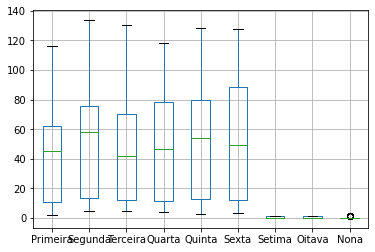

In [15]:
df.boxplot()

## **Two-way Anova:**

**Sobre o two-way Anova:** Uma variável numérica X mais x variáveis categóricas ou booleanas

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

In [19]:
model = ols('Primeira ~ Setima*Oitava*Nona', data = df).fit()
resultados2 = sm.stats.anova_lm(model)
resultados2

,df,sum_sq,mean_sq,F,PR(>F)
Setima,1.0,26652.637045,26652.637045,84.005364,6.032852e-12
Oitava,1.0,16276.709174,16276.709174,51.301899,5.200625e-09
Nona,1.0,1004.827119,1004.827119,3.167074,8.174388e-02
Setima:Oitava,1.0,46.560652,46.560652,0.146753,7.034228e-01
Setima:Nona,1.0,111.734142,111.734142,0.352170,5.557940e-01
Oitava:Nona,1.0,14.521889,14.521889,0.045771,8.315382e-01
Setima:Oitava:Nona,1.0,449.250781,449.250781,1.415975,2.401724e-01
Residual,46.0,14594.559696,317.273037,NaN,NaN


## One-way Anova:

**Sobre o one-way Anova:** O número X de variáveis numéricas tem que ser igual ao número de Y variáveis categóricas ou booleanas

In [9]:
from scipy.stats import f_oneway

In [56]:
F, p = f_oneway(df[['Primeira', 'Segunda', 'Terceira']], df[['Oitava', 'Setima', 'Nona']])

In [57]:
p

array([2.31584660e-15, 2.97767782e-17, 2.06110569e-15])

In [58]:
F

array([ 88.5390742 , 105.69409572,  88.97847467])

**Se p-valor(significância) >0.05:** Rejeita a hipótese nula. Do contrário rejeita a hipótese alternativa

## Teste de Tukey:

**Sobre o teste:** Fala qual variável rejeitou ou não o teste de hipótese

In [72]:
mc = MultiComparison(df['Primeira'], df['Setima'])

In [73]:
result = mc.tukeyhsd(alpha=0.01)

In [69]:
print(result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.01 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
 False   True  -46.512 0.001 -66.2044 -26.8196   True
-----------------------------------------------------
